In [1]:
%load_ext google.cloud.bigquery

In [2]:
import google.cloud.bigquery as bigquery
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pointbiserialr
import google.cloud.bigquery.client as client
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.linear_model import LogisticRegression
import datetime, timedelta

In [3]:
GOOGLE_APPLICATION_CREDENTIALS = 'C:\\Users\\anany\\Downloads\\mykey.json'
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'C:\\Users\\anany\\Downloads\\mykey.json'

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 11 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2010.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [4]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:02<00:00,  7.02rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39730,99999,1929,10,20,52.799999,4,45.500000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,33110,99999,1929,12,18,47.500000,4,44.000000,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,37770,99999,1931,4,24,50.200001,4,44.299999,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,726810,24131,1931,6,23,65.099998,24,41.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,726810,24131,1931,3,2,42.799999,24,31.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,726810,24131,1931,9,17,67.000000,24,40.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
6,726810,24131,1931,8,7,68.400002,24,37.200001,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1932,7,14,64.099998,24,54.099998,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
8,726810,24131,1932,10,23,41.099998,24,31.000000,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
9,726810,24131,1932,1,5,24.600000,24,21.100000,8.0,NaN,...,NaN,None,NaN,NaN,True,True,True,True,True,True


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2010 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [5]:
sql = """
    SELECT
    *, CONCAT(year,'-',month,'-',day) as date,
    FROM `bigquery-public-data.samples.gsod`
    WHERE (year between 2005 and 2010) and (station_number between 725300 and 726300)
    """

df = client.Client().query(sql).to_dataframe()

In [6]:
df.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,725869,99999,2005,8,18,58.099998,4,51.799999,4.0,NaN,...,None,0.15,NaN,False,False,False,False,False,False,2005-8-18
1,726056,99999,2005,12,11,34.900002,5,19.400000,5.0,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-12-11
2,725868,99999,2005,3,29,32.000000,6,31.400000,6.0,NaN,...,None,0.10,NaN,False,False,False,False,False,False,2005-3-29
3,725835,99999,2005,7,2,88.699997,6,32.000000,6.0,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-7-2
4,725868,99999,2005,2,22,24.000000,7,18.600000,7.0,NaN,...,None,0.00,15.0,True,True,True,True,True,True,2005-2-22


### 2. Task 
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2010. 

In [7]:
sql = """
    SELECT *, 
    CONCAT(year,'-',month,'-',day) as date,
    FROM `bigquery-public-data.samples.gsod`
    WHERE (year between 2005 and 2010) and (station_number between 725300 and 725330)
    """

df = bigquery.client.Client().query(sql).to_dataframe()

In [8]:
df.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,725326,99999,2005,12,8,8.200000,24,3.100000,24.0,NaN,...,None,0.0,NaN,False,False,False,False,False,False,2005-12-8
1,725326,99999,2005,9,18,66.400002,24,54.799999,24.0,NaN,...,None,0.0,NaN,False,False,False,False,False,False,2005-9-18
2,725326,99999,2005,2,23,28.600000,24,21.400000,24.0,NaN,...,None,0.0,NaN,False,False,False,False,False,False,2005-2-23
3,725326,99999,2007,3,23,52.000000,11,50.299999,11.0,NaN,...,None,0.0,NaN,False,False,False,False,False,False,2007-3-23
4,725326,99999,2007,12,25,28.900000,24,23.400000,24.0,NaN,...,None,0.0,NaN,False,False,False,False,False,False,2007-12-25


In [9]:
df.shape

(19189, 32)

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

Preprocessing steps:
1. Check dtypes of all columns
2. check duplicates
3. variable names without spaces
4. check nan values
5. Outliers
6. Remove nan values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19189 entries, 0 to 19188
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   station_number                      19189 non-null  int64  
 1   wban_number                         19189 non-null  int64  
 2   year                                19189 non-null  int64  
 3   month                               19189 non-null  int64  
 4   day                                 19189 non-null  int64  
 5   mean_temp                           19189 non-null  float64
 6   num_mean_temp_samples               19189 non-null  int64  
 7   mean_dew_point                      19187 non-null  float64
 8   num_mean_dew_point_samples          19187 non-null  float64
 9   mean_sealevel_pressure              17245 non-null  float64
 10  num_mean_sealevel_pressure_samples  17245 non-null  float64
 11  mean_station_pressure               1113 

#### Step 1: Convert object type to respective datatypes

In [11]:
df['max_temperature_explicit'] = df['max_temperature_explicit'].astype('bool')
df['date'] = pd.to_datetime(df['date'])

#### Step 2: Check for duplicates

In [12]:
df[df.duplicated()]

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date


#### Step 3: Remove empty columns

In [13]:
df = df.drop(columns=['min_temperature', 'min_temperature_explicit'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19189 entries, 0 to 19188
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   station_number                      19189 non-null  int64         
 1   wban_number                         19189 non-null  int64         
 2   year                                19189 non-null  int64         
 3   month                               19189 non-null  int64         
 4   day                                 19189 non-null  int64         
 5   mean_temp                           19189 non-null  float64       
 6   num_mean_temp_samples               19189 non-null  int64         
 7   mean_dew_point                      19187 non-null  float64       
 8   num_mean_dew_point_samples          19187 non-null  float64       
 9   mean_sealevel_pressure              17245 non-null  float64       
 10  num_mean_sealevel_pres

In [15]:
use_cols = ['mean_temp', 'mean_dew_point',
       'mean_sealevel_pressure',
       'mean_visibility', 'mean_wind_speed',
       'max_sustained_wind_speed',
       'max_temperature',
       'total_precipitation', 'snow_depth', 'snow', 'date']
data = df[use_cols]

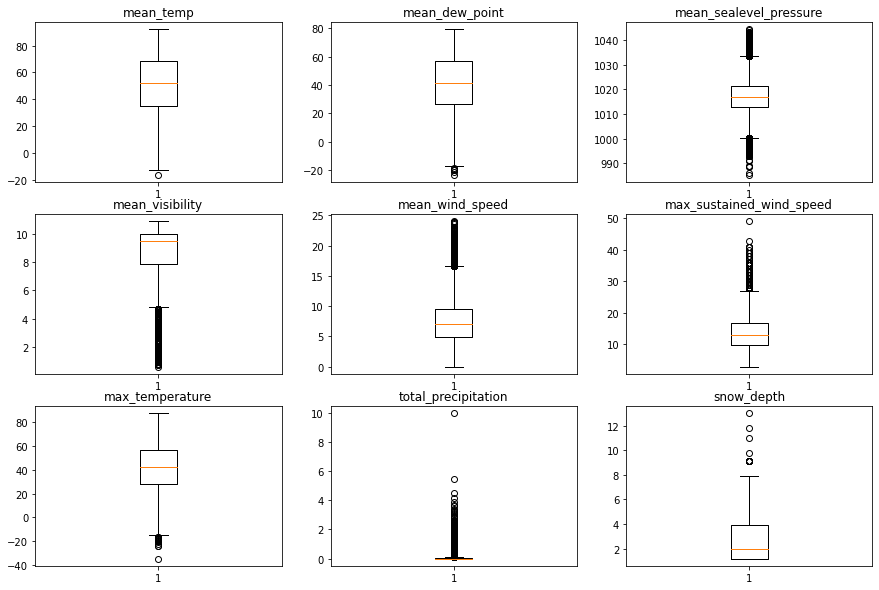

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        ax[i, j].set_title(data.columns[i*3+j])
        ax[i, j].boxplot(data.iloc[:, i * 3 + j].dropna())

#### Step 4: Convert NaN values with meaning values

In [17]:
df['snow_depth'] = df['snow_depth'].fillna(0)

#### Step 5: Check precipitation and max_sustained_wind_speed for outliers
##### Approach: check other values during that day to decide whether it's an anomaly

In [18]:
df[df['total_precipitation'] > 7]

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,max_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
16110,725300,94846,2005,5,13,56.799999,24,43.299999,24.0,1016.599976,...,False,9.99,0.0,False,False,False,False,False,False,2005-05-13


In [19]:
df[df['date'] == '2005-05-13']

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,max_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
2189,725316,99999,2005,5,13,69.599998,24,60.599998,24.0,1014.200012,...,True,0.17,0.0,False,False,False,False,False,False,2005-05-13
3245,725330,14827,2005,5,13,57.400002,24,40.500000,24.0,1020.400024,...,False,0.00,0.0,False,False,False,False,False,False,2005-05-13
3429,725320,14842,2005,5,13,65.000000,24,54.299999,24.0,1014.099976,...,False,0.00,0.0,True,True,True,True,True,True,2005-05-13
3810,725326,99999,2005,5,13,53.799999,24,48.000000,24.0,NaN,...,True,0.35,0.0,False,False,False,False,False,False,2005-05-13
10545,725305,99999,2005,5,13,56.299999,24,49.299999,24.0,1016.099976,...,False,0.13,0.0,False,False,False,False,False,False,2005-05-13
12038,725315,99999,2005,5,13,68.099998,24,55.900002,24.0,1015.000000,...,True,0.00,0.0,False,False,False,False,False,False,2005-05-13
13237,725327,99999,2005,5,13,57.700001,24,44.400002,24.0,1017.299988,...,False,0.08,0.0,False,False,False,False,False,False,2005-05-13
13799,725314,99999,2005,5,13,76.500000,24,63.099998,24.0,1014.200012,...,False,0.00,0.0,False,False,False,False,False,False,2005-05-13
16110,725300,94846,2005,5,13,56.799999,24,43.299999,24.0,1016.599976,...,False,9.99,0.0,False,False,False,False,False,False,2005-05-13
18547,725317,99999,2005,5,13,70.000000,24,60.900002,24.0,1015.700012,...,False,0.00,0.0,False,False,False,False,False,False,2005-05-13


In [20]:
df = df[df['total_precipitation'] < 9]

In [22]:
df[df['max_sustained_wind_speed'] > 45]

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,max_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
11722,725315,99999,2006,4,3,49.099998,24,44.0,23.0,1009.0,...,True,0.49,0.0,False,False,False,False,False,False,2006-04-03


In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df[df['date'] == '2006-04-03']

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
2544,725300,94846,2006,4,3,50.000000,24,42.599998,24.0,1005.799988,17.0,NaN,NaN,8.1,24.0,12.9,24.0,25.1,29.900000,39.000000,False,0.95,0.0,False,False,False,False,False,False,2006-04-03
4701,725317,99999,2006,4,3,49.099998,21,41.500000,21.0,1009.900024,20.0,NaN,NaN,9.6,21.0,17.0,21.0,27.0,36.900002,42.799999,True,0.00,0.0,False,False,False,False,False,False,2006-04-03
5063,725305,99999,2006,4,3,48.700001,24,43.099998,24.0,1006.900024,19.0,NaN,NaN,7.9,24.0,14.6,24.0,23.9,30.900000,39.000000,False,0.54,0.0,False,False,False,False,False,False,2006-04-03
6212,725314,99999,2006,4,3,54.700001,24,40.599998,24.0,1012.599976,22.0,NaN,NaN,10.0,24.0,14.9,24.0,25.1,33.000000,48.000000,False,0.47,0.0,False,False,False,False,False,False,2006-04-03
11218,725330,14827,2006,4,3,49.000000,24,43.599998,24.0,1004.700012,20.0,NaN,NaN,9.6,24.0,16.4,24.0,30.9,40.000000,39.900002,False,0.51,0.0,False,False,False,False,False,False,2006-04-03
11722,725315,99999,2006,4,3,49.099998,24,44.000000,23.0,1009.000000,19.0,NaN,NaN,9.4,24.0,18.6,24.0,49.0,63.900002,42.799999,True,0.49,0.0,False,False,False,False,False,False,2006-04-03
13385,725327,99999,2006,4,3,48.000000,24,40.599998,24.0,1005.200012,20.0,NaN,NaN,8.7,24.0,11.9,24.0,26.0,43.900002,37.400002,True,0.34,0.0,False,False,False,False,False,False,2006-04-03
14913,725316,99999,2006,4,3,50.599998,24,42.700001,24.0,1009.700012,21.0,NaN,NaN,9.6,24.0,16.1,24.0,25.1,35.900002,42.799999,True,0.65,0.0,False,False,False,False,False,False,2006-04-03
17089,725320,14842,2006,4,3,49.799999,24,40.599998,24.0,1009.000000,21.0,NaN,NaN,9.2,24.0,14.6,24.0,22.9,33.000000,42.099998,False,0.41,0.0,False,False,False,False,False,False,2006-04-03
17994,725326,99999,2006,4,3,49.700001,22,40.299999,21.0,NaN,NaN,NaN,NaN,9.2,22.0,13.5,22.0,21.0,35.900002,41.000000,True,0.18,0.0,False,False,False,False,False,False,2006-04-03


In [24]:
df = df[df['max_sustained_wind_speed'] < 48]

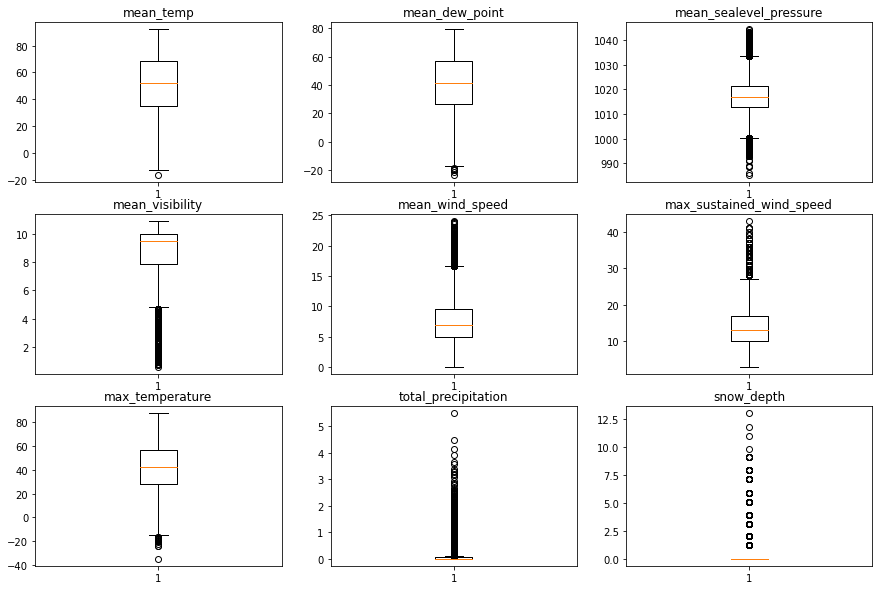

In [25]:
data = df[use_cols]
fig, ax = plt.subplots(3, 3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        ax[i, j].set_title(data.columns[i*3+j])
        ax[i, j].boxplot(data.iloc[:, i * 3 + j].dropna())

<AxesSubplot:>

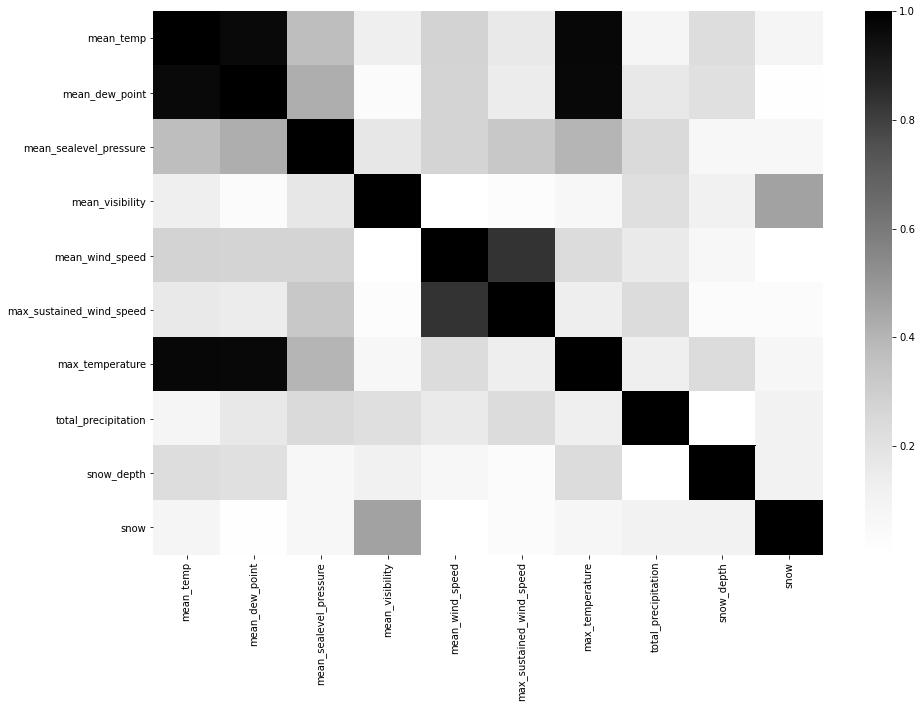

In [26]:
data = df[use_cols]
plt.subplots(figsize=(15,10))
sns.heatmap(np.abs(data.corr()), cmap='Greys')

#### Result: Snow is neither correlated to temperature values nor snow_depth. But has very high correlation with visibility.

#### Observation: Low visibility values mostly corresponds to "True" snow values.

In [27]:
data[data['mean_visibility'] < 1]

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow_depth,snow,date
528,31.799999,30.500000,1014.200012,0.9,3.1,7.0,30.000000,0.00,0.0,True,2010-01-17
2555,36.599998,34.799999,1009.599976,0.9,9.3,15.0,16.000000,0.10,0.0,True,2008-02-04
2675,34.200001,33.000000,NaN,0.9,5.8,11.1,33.799999,0.01,0.0,False,2007-12-21
4343,38.099998,38.099998,1010.799988,0.9,9.7,19.0,33.799999,0.01,0.0,True,2010-01-23
5981,38.500000,37.299999,NaN,0.6,6.4,12.0,33.799999,0.00,0.0,False,2007-12-22
7047,38.099998,36.500000,1013.599976,0.7,3.3,8.0,37.000000,0.00,0.0,True,2007-12-21
10514,43.700001,31.900000,1010.200012,0.8,7.2,23.9,33.799999,0.54,0.0,True,2008-02-04
12194,37.500000,36.099998,1011.000000,0.7,9.3,15.0,33.799999,0.00,0.0,True,2010-01-23
13211,37.599998,37.200001,1013.900024,0.9,3.5,8.0,35.099998,0.01,0.0,True,2007-12-21
14578,30.299999,28.799999,1023.799988,0.8,3.7,8.9,28.400000,0.00,0.0,True,2010-01-16


#### Previous assumption: snow_depth NaN for the cases when there is no snow.
#### Contradiction: When there is value for total_precipitation, the snow_depth is NaN and snow is True. e.g. precipitation 1.74, snow is true, but snow_depth is NaN. Therefore, cannot fill with zeros. 

In [28]:
df[(df['mean_visibility'] < 1) & (df['snow'] == True)].head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
528,725330,14827,2010,1,17,31.799999,24,30.500000,24.0,1014.200012,13.0,NaN,NaN,0.9,24.0,3.1,24.0,7.0,NaN,30.000000,False,0.00,0.0,True,True,True,True,True,True,2010-01-17
2555,725320,14842,2008,2,4,36.599998,24,34.799999,24.0,1009.599976,19.0,NaN,NaN,0.9,24.0,9.3,24.0,15.0,20.0,16.000000,False,0.10,0.0,True,True,True,True,True,True,2008-02-04
4343,725316,3887,2010,1,23,38.099998,24,38.099998,24.0,1010.799988,14.0,NaN,NaN,0.9,24.0,9.7,24.0,19.0,25.1,33.799999,True,0.01,0.0,True,True,True,True,True,True,2010-01-23
7047,725320,14842,2007,12,21,38.099998,24,36.500000,24.0,1013.599976,22.0,NaN,NaN,0.7,24.0,3.3,24.0,8.0,NaN,37.000000,True,0.00,0.0,True,True,True,True,True,True,2007-12-21
10514,725317,99999,2008,2,4,43.700001,24,31.900000,24.0,1010.200012,17.0,NaN,NaN,0.8,24.0,7.2,24.0,23.9,30.9,33.799999,True,0.54,0.0,True,True,True,True,True,True,2008-02-04


#### Saw very high temperatures when snow was true, so conclude that snow column true does not necessarily correspond to actual snow (might be due to other boolean attributes)

In [29]:
data[data['snow'] == True].describe()

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow_depth
count,2217.000000,2217.000000,2216.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000
mean,46.154578,39.917456,1015.830326,6.405819,7.528868,14.563915,37.682183,0.173175,0.292648
std,19.572430,18.455083,7.277883,2.132325,4.024272,6.006376,18.636992,0.357168,1.152800
min,-1.200000,-8.500000,985.299988,0.700000,0.100000,2.900000,-14.800000,0.000000,0.000000
25%,31.200001,26.299999,1011.700012,5.000000,4.400000,9.900000,24.799999,0.000000,0.000000
50%,40.900002,36.500000,1016.000000,6.600000,6.900000,14.000000,33.799999,0.020000,0.000000
75%,65.199997,56.700001,1020.099976,8.100000,10.000000,18.100000,55.000000,0.170000,0.000000
max,88.599998,76.199997,1043.000000,10.000000,23.600000,41.000000,80.599998,4.470000,13.000000


#### Checked whenever there is a snow_depth, then it makes sense that it snowed. So to be sure, we will keep only values of snow=True whenever there is a snow_depth > 0. Initial assumption was wrong

In [30]:
data[(data['snow'] == True) & (data['snow_depth'] > 0)]

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow_depth,snow,date
36,25.600000,20.500000,1017.500000,6.3,8.5,12.0,19.000000,0.08,1.2,True,2005-12-04
57,22.799999,19.900000,1028.500000,2.0,2.6,7.0,10.000000,0.00,5.1,True,2005-02-04
360,29.299999,23.799999,1010.099976,3.9,11.4,21.0,21.900000,0.62,3.9,True,2008-02-26
384,29.100000,23.900000,1019.700012,6.6,9.5,14.0,19.000000,0.05,5.9,True,2008-12-26
492,34.200001,27.700001,1014.500000,9.1,9.1,15.0,15.100000,0.00,1.2,True,2005-02-12
834,10.200000,2.800000,1034.599976,7.8,5.1,11.1,6.100000,0.00,3.9,True,2008-12-16
876,24.299999,20.600000,1015.599976,4.5,4.6,13.0,10.900000,0.07,1.2,True,2006-02-12
950,34.700001,30.200001,1009.500000,9.3,10.2,13.0,33.099998,0.01,1.2,True,2005-12-26
996,32.099998,30.200001,1020.500000,1.7,3.7,12.0,18.000000,0.09,1.2,True,2006-03-06
1059,15.200000,8.900000,1023.500000,4.1,12.9,20.0,8.600000,0.31,9.8,True,2007-02-14


#### Kept snow values True ONLY for the cases when we have snow_depth > 0 (to omit other boolean factors)

In [31]:
data.loc[:, 'snow'] = False
data.loc[data['snow_depth'] > 0, 'snow'] = True

c:\users\anany\anaconda3\envs\learnings\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\anany\anaconda3\envs\learnings\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
data[data['snow'] == True].describe()

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow_depth
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,23.480635,16.764750,1019.483057,7.446142,8.979576,15.145991,15.340545,0.085325,2.823752
std,9.410475,10.814221,8.658981,2.303187,3.504178,4.889792,10.534156,0.181490,2.043666
min,-10.400000,-19.200001,985.900024,1.000000,1.700000,4.100000,-18.900000,0.000000,1.200000
25%,17.400000,9.800000,1014.099976,5.900000,6.200000,11.100000,8.100000,0.000000,1.200000
50%,24.600000,17.700001,1019.500000,7.900000,8.700000,15.000000,16.000000,0.000000,2.000000
75%,30.299999,24.700001,1024.599976,9.600000,11.400000,18.100000,24.100000,0.080000,3.900000
max,51.900002,50.599998,1044.099976,10.000000,20.200001,32.099998,41.000000,1.280000,13.000000


<AxesSubplot:>

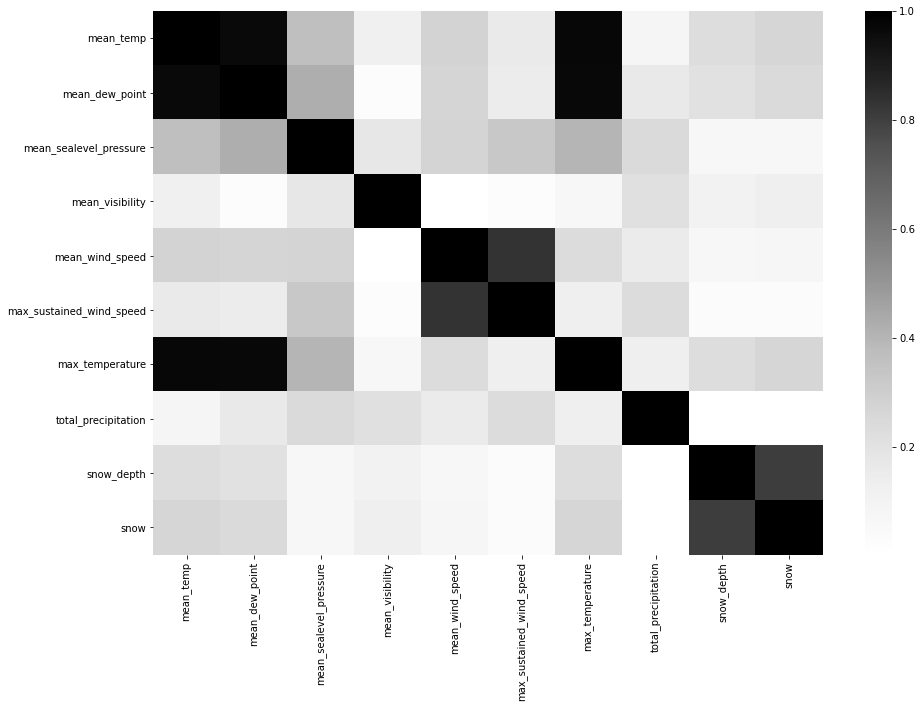

In [33]:
plt.subplots(figsize=(15,10))
sns.heatmap(np.abs(data.corr()), cmap='Greys')

#### Step 6: Dropped remaining NA values

In [34]:
data = data.dropna()

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [35]:
# target_date = str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]
target_date = '2010-04-16'
target_data = data[data['date'] == target_date][use_cols]
data = data[data['date'] != target_date]

In [36]:
data = data.drop(columns=['date'])
target_data = target_data.drop(columns=['date'])

#### Min-max normalization

In [37]:
x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(x_scaled, columns=data.columns)

#### using snow_depth feels like cheating :) (gave 100% accuracy)

In [38]:
y = data[['snow']]
data = data.drop(columns=['snow', 'snow_depth'])
y_target = target_data[['snow']]
target_data = target_data.drop(columns=['snow', 'snow_depth'])
data.shape

(17045, 8)

#### Train test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

#### Add target date to test set

In [40]:
X_test = X_test.append(target_data, ignore_index=True)
y_test = y_test.append(y_target, ignore_index=True)

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [41]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]

'2010-05-18'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

#### Used two ml models namely Decision Tree and Random Forest

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
print(f'Model Accuracy: {tree.score(X_test, y_test)}')

Model Accuracy: 0.9329054842473745


In [44]:
from sklearn.metrics import classification_report
predicted = tree.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (tree, classification_report(y_test, predicted)))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1661
         1.0       0.14      0.23      0.17        53

    accuracy                           0.93      1714
   macro avg       0.56      0.59      0.57      1714
weighted avg       0.95      0.93      0.94      1714




In [45]:
tree.feature_importances_

array([0.21791338, 0.12595397, 0.16565735, 0.09799362, 0.13920068,
       0.08600389, 0.10829761, 0.05897949])

In [46]:
X_train.columns

Index(['mean_temp', 'mean_dew_point', 'mean_sealevel_pressure',
       'mean_visibility', 'mean_wind_speed', 'max_sustained_wind_speed',
       'max_temperature', 'total_precipitation'],
      dtype='object')

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

<ipython-input-47-b86cf45812a9>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_features='sqrt')

In [48]:
predictions = model.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (tree, classification_report(y_test, predictions)))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1661
         1.0       0.29      0.04      0.07        53

    accuracy                           0.97      1714
   macro avg       0.63      0.52      0.53      1714
weighted avg       0.95      0.97      0.96      1714




In [49]:
model.predict(target_data)

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
y_target

,snow
15,False
170,False
3338,False
3834,False
4014,False
7476,False
8148,False
9462,False
15217,False
